In [19]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [20]:
df1 = pd.read_excel('Datasets/actual_data.xls')
df1.head(10)


,Temperature,Turbidity,pH,Result
0,25,13,7,1
1,26,8,7,1
2,28,12,7,1
3,30,7,9,1
4,24,7,7,1
5,25,11,7,1
6,28,9,6,1
7,25,6,6,1
8,26,11,6,1
9,26,11,8,1


In [21]:
# test_data1 = df1.iloc[:5, 0:]
# test_data1 = pd.concat([test_data1, df1.iloc[-5:, 0:]], axis=0)
# df1 = df1.drop(test_data1.index)
# test_data1

In [22]:
df2 = pd.read_csv('Datasets/Test_Resources/sensorData.csv')
df2 = df2.drop(["Occurance", "Storage"], axis=1)
df2.head()

,Temperature,Turbidity,pH
0,41.0,10.00,0
1,33.0,12.93,0
2,33.0,12.89,0
3,33.0,12.88,0
4,33.0,12.97,0


In [23]:
def check_water_quality(row):
    temp = row['Temperature']
    turbidity = row['Turbidity']
    ph = row['pH']
    
    temp_check = (24 <= temp <= 30)
    
    turbidity_check = (turbidity > 5)
    
    ph_check = (6 <= ph <= 9)

    if temp_check and turbidity_check and ph_check:
        return 1
    else:
        return 0

df2['Result'] = df2.apply(check_water_quality, axis=1)

In [24]:
# test_data2 = df2.iloc[:5, 0:]
# test_data2 = pd.concat([test_data2, df2.iloc[-5:, 0:]], axis=0)
# df2 = df2.drop(test_data2.index)
# test_data2

In [25]:
water_quality_counts = df2['Result'].value_counts()

print("Count of 0s (not good water quality):", water_quality_counts[0])
print("Count of 1s (good water quality):", water_quality_counts[1])

Count of 0s (not good water quality): 462
Count of 1s (good water quality): 216


In [26]:
df = pd.concat([df1, df2], axis=0)
df.head()

,Temperature,Turbidity,pH,Result
0,25.0,13.0,7,1
1,26.0,8.0,7,1
2,28.0,12.0,7,1
3,30.0,7.0,9,1
4,24.0,7.0,7,1


In [27]:
missing_values_count = df.isna().sum()
print("Missing values count per column:")
print(missing_values_count)

Missing values count per column:
Temperature    0
Turbidity      0
pH             0
Result         0
dtype: int64


In [28]:
df = df.dropna()

In [29]:
water_quality_counts = df['Result'].value_counts()

print("Count of 0s (not good water quality):", water_quality_counts[0])
print("Count of 1s (good water quality):", water_quality_counts[1])

Count of 0s (not good water quality): 1515
Count of 1s (good water quality): 1216


In [30]:
# test_data = pd.read_excel('waterQuality_detection-main/testing_data.xls')
# test_data = pd.concat([test_data1, test_data2], axis=0)

In [31]:
# test_data = pd.concat([test_data, df.iloc[-5:, 0:]], axis=0)
# test_data

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(['Result'],axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Count of 0s (not good water quality): 1060
Count of 1s (good water quality): 851


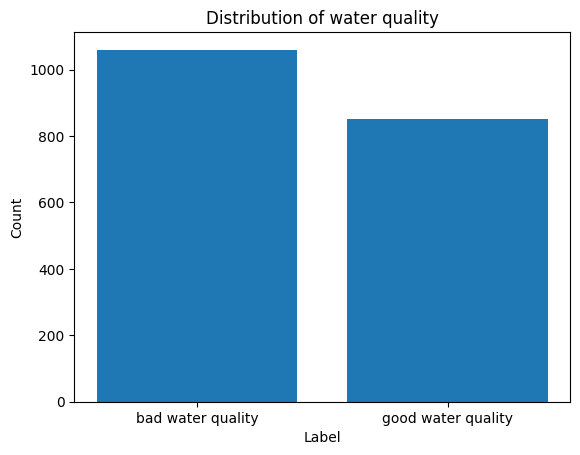

In [33]:
water_quality_counts = y_train.value_counts()
print("Count of 0s (not good water quality):", water_quality_counts[0])
print("Count of 1s (good water quality):", water_quality_counts[1])
fig, ax = plt.subplots()
ax.bar(['bad water quality', 'good water quality'], [water_quality_counts[0], water_quality_counts[1]])

# set plot title and labels
ax.set_title('Distribution of water quality')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.savefig('Distribution of water quality.png')
plt.show()

In [34]:
# Creating model
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean',weights = 'uniform', algorithm = 'auto')
knn.fit(X_train,y_train)


KNeighborsClassifier(metric='euclidean')

In [35]:
# Predicting quality using test values
y_pred = knn.predict(X_test)
print("Predicted result:\n",y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of testing dataset:",accuracy)
print("Classification report:\n",classification_report(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cm)

Predicted result:
 [0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1

In [36]:
pickle.dump(knn,open('model_knn_final.pkl','wb'))